In [25]:
#Import all needed Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


%matplotlib inline

In [2]:
#Import and Review Data
df = pd.read_csv('./data/df.csv', index_col=None, header=0)
df = df.dropna()
df.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,All-Star,YEAR
0,AJ Hammons_2017,DAL,24.0,22.0,4.0,18.0,163.0,48.0,17.0,42.0,...,10.0,1.0,13.0,21.0,129.2,0.0,0.0,-5.0,0.0,2017
1,Aaron Brooks_2017,IND,32.0,65.0,36.0,29.0,894.0,322.0,121.0,300.0,...,66.0,25.0,9.0,93.0,628.3,0.0,0.0,-32.0,0.0,2017
2,Aaron Gordon_2017,ORL,21.0,80.0,29.0,51.0,2298.0,1019.0,393.0,865.0,...,89.0,65.0,40.0,172.0,1956.0,7.0,0.0,-163.0,0.0,2017
3,Aaron Harrison_2017,CHA,22.0,5.0,2.0,3.0,17.0,1.0,0.0,4.0,...,0.0,0.0,0.0,2.0,9.1,0.0,0.0,-5.0,0.0,2017
4,Adreian Payne_2017,MIN,26.0,18.0,5.0,13.0,135.0,63.0,23.0,54.0,...,8.0,8.0,7.0,32.0,150.1,0.0,0.0,8.0,0.0,2017


In [3]:
#Set up X and y
X = df.drop(['All-Star','PLAYER','TEAM'], axis = 1)
y = df['All-Star']

In [4]:
#Set up Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.25, stratify=y)

In [5]:
#Scale data
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [6]:
#Shape
X_train_sc.shape, X_test_sc.shape, y_train.shape, y_test.shape

((6708, 28), (2236, 28), (6708,), (2236,))

In [7]:
#Shape
X_train_sc[0].shape

(28,)

In [34]:
#Set up Model
model = Sequential()

model.add(Dense(16,
               input_shape = (28,),
               activation = 'relu'))

model.add(Dense(8,
            activation = 'relu'))

model.add(Dense(4,
            activation = 'relu'))

#Output layer - now we will use an actiatoin function to transform
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics = ['accuracy'])

history = model.fit(X_train_sc, y_train, validation_data = (X_test_sc, y_test),
         epochs = 200, batch_size = 512,verbose=1)

Epoch 1/200
14/14 [==============================] - 2s 115ms/step - loss: 0.6187 - accuracy: 0.6570 - val_loss: 0.5694 - val_accuracy: 0.7504
Epoch 2/200
14/14 [==============================] - 0s 31ms/step - loss: 0.5244 - accuracy: 0.8330 - val_loss: 0.4865 - val_accuracy: 0.8886
Epoch 3/200
14/14 [==============================] - 0s 35ms/step - loss: 0.4464 - accuracy: 0.9302 - val_loss: 0.4166 - val_accuracy: 0.9468
Epoch 4/200
14/14 [==============================] - 0s 26ms/step - loss: 0.3817 - accuracy: 0.9492 - val_loss: 0.3606 - val_accuracy: 0.9459
Epoch 5/200
14/14 [==============================] - 1s 36ms/step - loss: 0.3297 - accuracy: 0.9504 - val_loss: 0.3153 - val_accuracy: 0.9463
Epoch 6/200
14/14 [==============================] - 0s 34ms/step - loss: 0.2866 - accuracy: 0.9498 - val_loss: 0.2781 - val_accuracy: 0.9472
Epoch 7/200
14/14 [==============================] - 0s 28ms/step - loss: 0.2511 - accuracy: 0.9517 - val_loss: 0.2471 - val_accuracy: 0.9486
Epoch

14/14 [==============================] - 0s 26ms/step - loss: 0.0576 - accuracy: 0.9753 - val_loss: 0.0773 - val_accuracy: 0.9732
Epoch 59/200
14/14 [==============================] - 0s 28ms/step - loss: 0.0573 - accuracy: 0.9756 - val_loss: 0.0770 - val_accuracy: 0.9732
Epoch 60/200
14/14 [==============================] - 0s 29ms/step - loss: 0.0576 - accuracy: 0.9742 - val_loss: 0.0775 - val_accuracy: 0.9732
Epoch 61/200
14/14 [==============================] - 0s 29ms/step - loss: 0.0572 - accuracy: 0.9747 - val_loss: 0.0772 - val_accuracy: 0.9727
Epoch 62/200
14/14 [==============================] - 0s 23ms/step - loss: 0.0572 - accuracy: 0.9750 - val_loss: 0.0759 - val_accuracy: 0.9727
Epoch 63/200
14/14 [==============================] - 0s 31ms/step - loss: 0.0567 - accuracy: 0.9750 - val_loss: 0.0766 - val_accuracy: 0.9727
Epoch 64/200
14/14 [==============================] - 0s 35ms/step - loss: 0.0566 - accuracy: 0.9754 - val_loss: 0.0765 - val_accuracy: 0.9727
Epoch 65/200

14/14 [==============================] - 0s 20ms/step - loss: 0.0513 - accuracy: 0.9763 - val_loss: 0.0765 - val_accuracy: 0.9727
Epoch 116/200
14/14 [==============================] - 0s 33ms/step - loss: 0.0512 - accuracy: 0.9769 - val_loss: 0.0785 - val_accuracy: 0.9723
Epoch 117/200
14/14 [==============================] - 0s 19ms/step - loss: 0.0509 - accuracy: 0.9772 - val_loss: 0.0765 - val_accuracy: 0.9727
Epoch 118/200
14/14 [==============================] - 0s 29ms/step - loss: 0.0511 - accuracy: 0.9760 - val_loss: 0.0779 - val_accuracy: 0.9727
Epoch 119/200
14/14 [==============================] - 0s 33ms/step - loss: 0.0512 - accuracy: 0.9767 - val_loss: 0.0768 - val_accuracy: 0.9723
Epoch 120/200
14/14 [==============================] - 0s 26ms/step - loss: 0.0520 - accuracy: 0.9758 - val_loss: 0.0772 - val_accuracy: 0.9718
Epoch 121/200
14/14 [==============================] - 0s 20ms/step - loss: 0.0515 - accuracy: 0.9767 - val_loss: 0.0772 - val_accuracy: 0.9723
Epoch 

Epoch 172/200
14/14 [==============================] - 0s 27ms/step - loss: 0.0477 - accuracy: 0.9784 - val_loss: 0.0799 - val_accuracy: 0.9723
Epoch 173/200
14/14 [==============================] - 1s 41ms/step - loss: 0.0476 - accuracy: 0.9787 - val_loss: 0.0798 - val_accuracy: 0.9723
Epoch 174/200
14/14 [==============================] - 0s 29ms/step - loss: 0.0476 - accuracy: 0.9787 - val_loss: 0.0801 - val_accuracy: 0.9727
Epoch 175/200
14/14 [==============================] - 1s 46ms/step - loss: 0.0476 - accuracy: 0.9781 - val_loss: 0.0798 - val_accuracy: 0.9718
Epoch 176/200
14/14 [==============================] - 0s 30ms/step - loss: 0.0478 - accuracy: 0.9785 - val_loss: 0.0799 - val_accuracy: 0.9718
Epoch 177/200
14/14 [==============================] - 0s 30ms/step - loss: 0.0476 - accuracy: 0.9782 - val_loss: 0.0802 - val_accuracy: 0.9723
Epoch 178/200
14/14 [==============================] - 0s 16ms/step - loss: 0.0477 - accuracy: 0.9776 - val_loss: 0.0813 - val_accuracy:

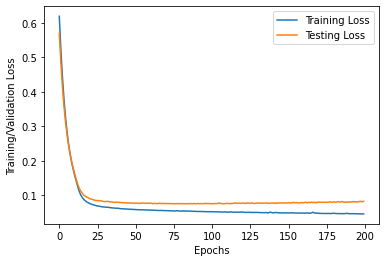

In [35]:
#plot Loss
plt.plot(history.history['loss'], label ='Training Loss')
plt.plot(history.history['val_loss'], label = 'Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Training/Validation Loss')
plt.legend();

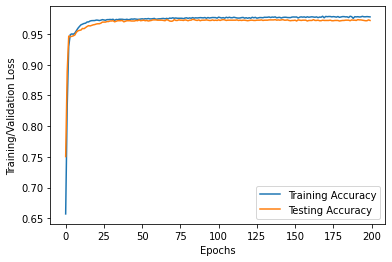

In [36]:
#plot Accuracy
plt.plot(history.history['accuracy'], label ='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training/Validation Loss')
plt.legend();

In [37]:
#View final value Test
model.evaluate(X_test_sc,y_test,verbose = 0)

[0.08270343393087387, 0.9722719192504883]

In [38]:
#View final value Train
model.evaluate(X_train_sc,y_train,verbose = 0)

[0.04596056789159775, 0.9783840179443359]